#Useful functions

In [37]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 13.0 MB/s eta 0:00:00


##Model Assesment

In [44]:
#Function to assess model and visualize outcome

def assess_model(model_name,train,test,predictions,chart_title):
  mae=mean_absolute_error(test,predictions)
  rmse=np.sqrt(mean_squared_error(test,predictions))
  mape=mean_absolute_percentage_error(test,predictions)

  print(f'Model:{model_name}')
  print(f'MAE:{mae:.2f}')
  print(f'RMSE:{rmse:.2f}')
  print(f'MAPE:{100 * mape:.2f}%')
  plt.figure(figsize=(10,4))
  plt.plot(train,label='Training')
  plt.plot(test,label='Test')
  plt.plot(predictions,label='Forecast')
  plt.title(chart_title)
  plt.legend()
  plt.show()
  return mae,rmse,mape


In [ ]:
assess_model('Triple Exponential Smoothing',train,test,predictions_double_triple,'Triple Exponential Smoothing -Holt Winter')


##Predicting Future

In [ ]:
#Function to plot the future

def plot_future(y,forcast,title):
  plt.figure(figsize=(10,4))
  plt.plot(y,label='Training')
  # plt.plot(test,label='Test')
  plt.plot(forcast,label='Forecast')
  plt.title(f"Train and Forcast with {title}")

#Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

from pmdarima import auto_arima,ARIMA,model_selection

from sklearn.model_selection import ParameterGrid

#Data Loading

In [118]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/Arima_sarima_sarimax/daily_revenue.csv',
                index_col='date',
                parse_dates=True,dayfirst=True)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1795 entries, 2018-01-01 to 2022-11-30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        1795 non-null   float64
 1   discount_rate  1795 non-null   object 
 2   coupon_rate    1795 non-null   object 
dtypes: float64(1), object(2)
memory usage: 56.1+ KB


In [9]:
#Transform Revenue into float
df['revenue']=df['revenue'].str.replace(',','').astype(float)

In [11]:
#Setting the frequency

df = df.asfreq('D')

In [12]:
#renaming coulmn

df.rename(columns={'revenue':'y'},inplace=True)

In [13]:
df.head()

,y,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


In [14]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='date', length=1795, freq='D')

#EDA (Exploratory Data Analysis)

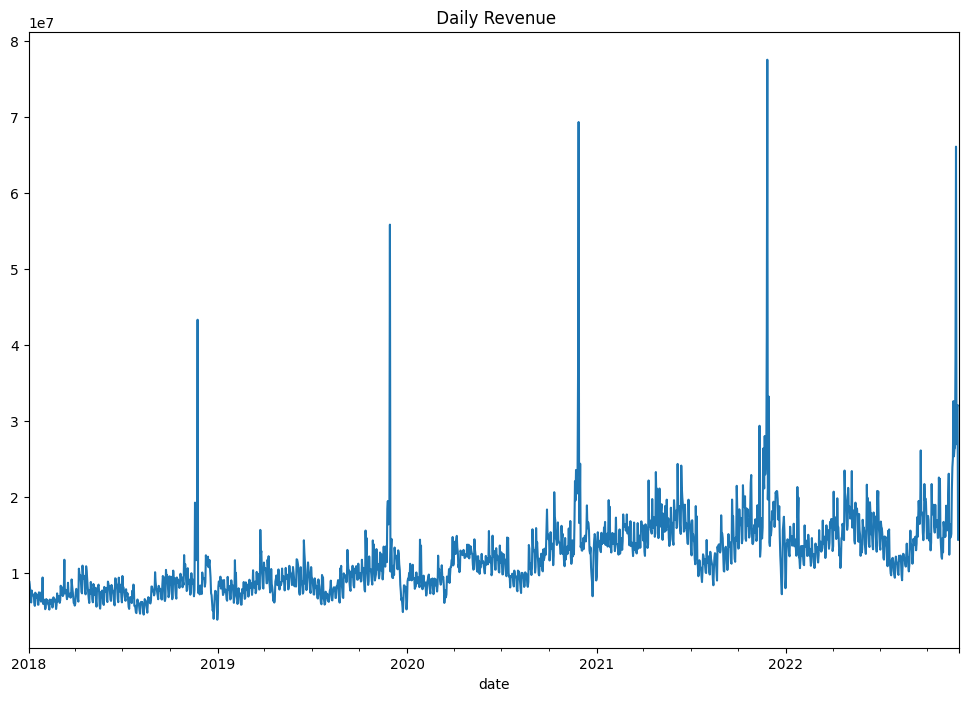

In [15]:
df['y'].plot(figsize=(12,8))
plt.title(' Daily Revenue')
plt.show()

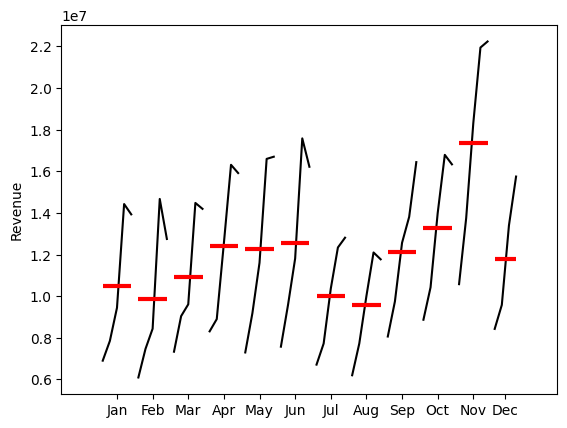

In [16]:
#plotting the monthly seasonality

month_plot(df['y'].resample('ME').mean(),ylabel='Revenue')

plt.show()

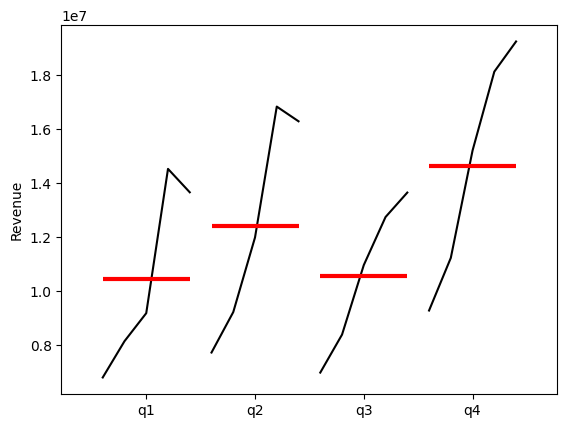

In [18]:
#plotting the quaterly seasonality

quarter_plot(df['y'].resample('QE').mean(),ylabel='Revenue')

plt.show()

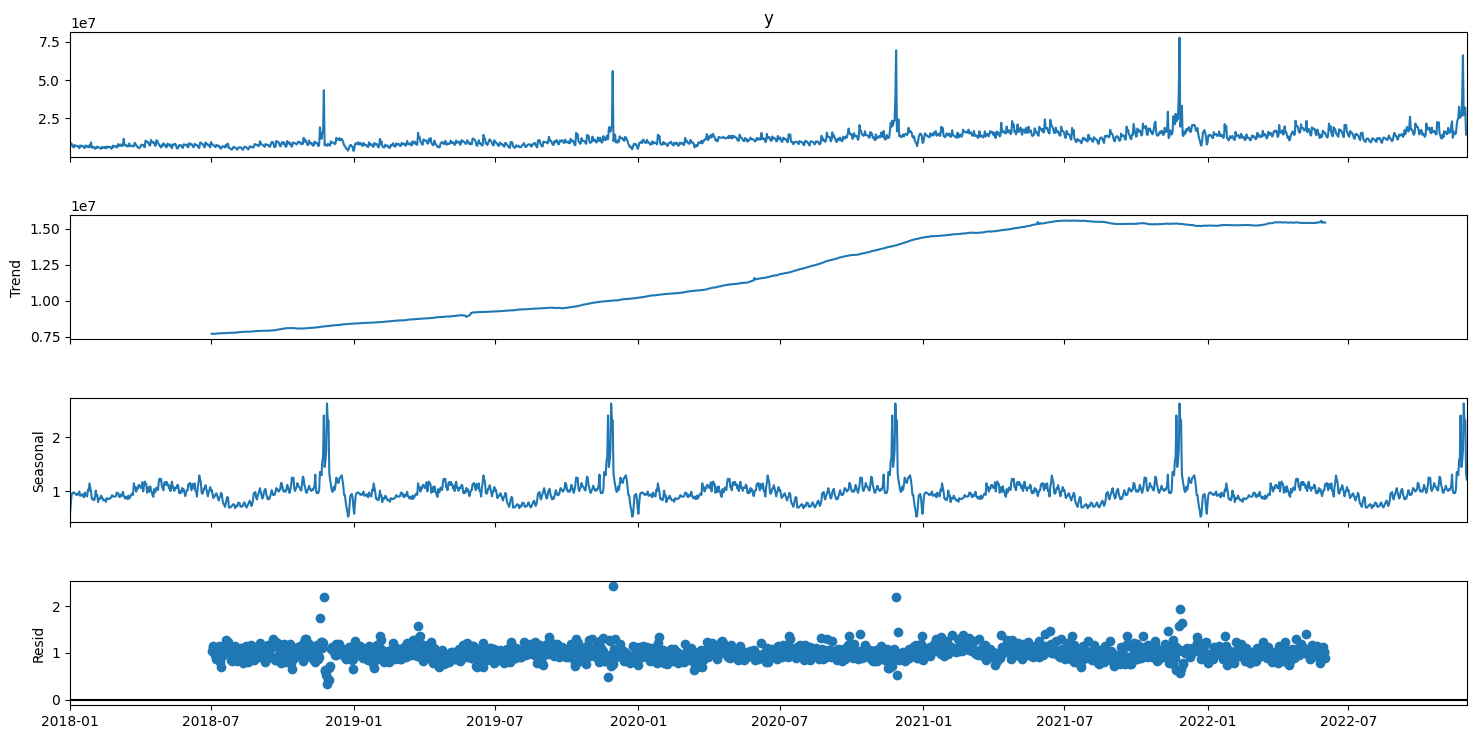

In [23]:
#seasonal decompostion plot for daily revenue data

decomposition =seasonal_decompose(df['y'],model='multiplicative',period=365)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

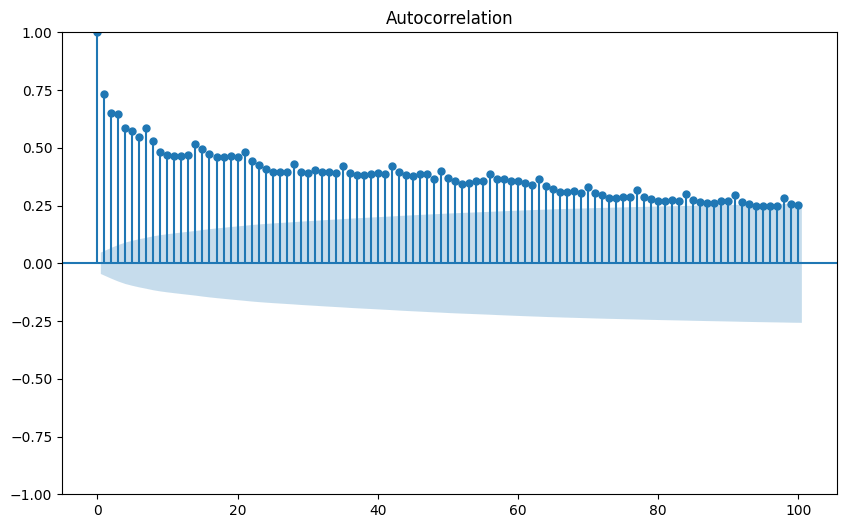

In [20]:
#Plot the autocorrelation (ACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df['y'],lags=100,ax=ax)
plt.show()

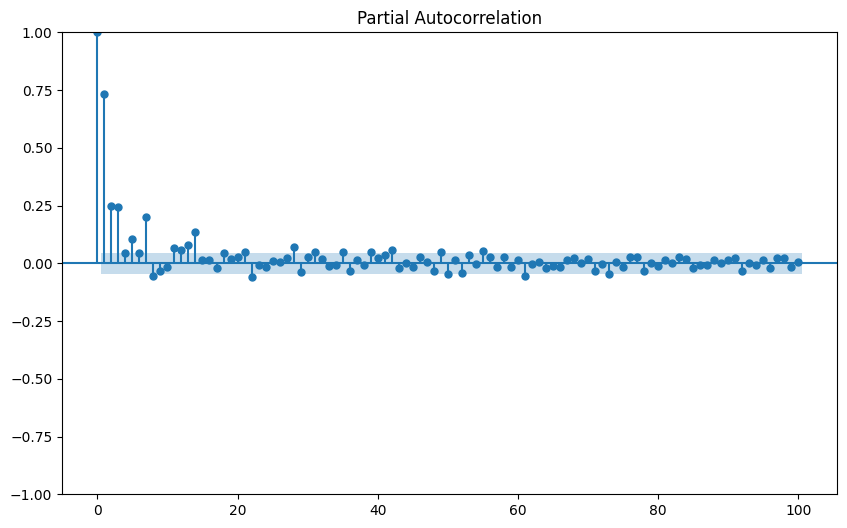

In [22]:
#Plot the partial autocorrelation (PACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df['y'],lags=100,ax=ax)
plt.show()

#Stationarity


In [24]:
from statsmodels.tsa.stattools import adfuller



In [26]:
#df.y is the time series
#Perform ADF test

result = adfuller(df['y'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))


#Interpret the results

if result[1] > 0.05:
	print('The time series is non-stationary')
else:
	print('The time series is stationary')



ADF Statistic: -2.558400
p-value: 0.101904
The time series is non-stationary


In [29]:
#write the code to make df.y stationary and plot the df.y
# and differenced df.y

df['y_diff']=df['y'].diff()
df.dropna(inplace=True)

print(df['y_diff'])

date
2018-01-04     -660303.0
2018-01-05    -1410495.0
2018-01-06     -279885.0
2018-01-07     1566426.0
2018-01-08     -625732.0
                 ...    
2022-11-26   -39180777.0
2022-11-27     4955921.0
2022-11-28      210050.0
2022-11-29   -17786305.0
2022-11-30      712049.0
Freq: D, Name: y_diff, Length: 1792, dtype: float64


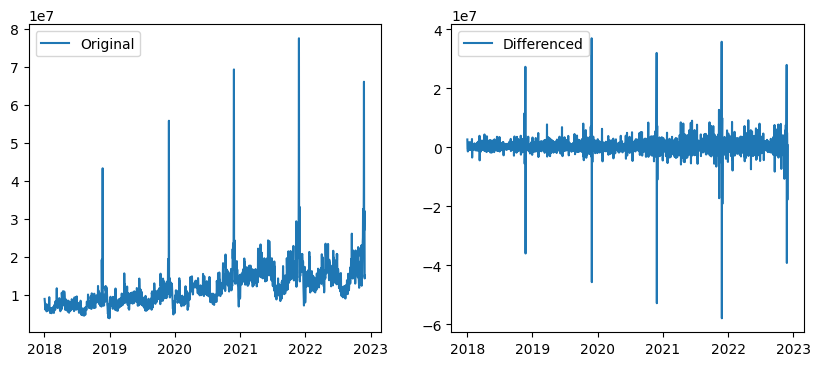

In [27]:


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df['y'],label='Original')
plt.legend()
plt.subplot(1,2,2)
plt.plot(df['y_diff'],label='Differenced')
plt.legend()
plt.show()

In [30]:
#Perform ADF test

result = adfuller(df['y_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))


#Interpret the results

if result[1] > 0.05:
	print('The time series is non-stationary')
else:
	print('The time series is stationary')



ADF Statistic: -12.802577
p-value: 0.000000
The time series is stationary


#ARIMA Model

In [34]:
#split the  data into trainig and test

test_size = 30
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [35]:
len(train),len(test)

(1762, 30)

In [39]:
# test

In [41]:
#Using pmdarima for the arima model

# model = auto_arima(train,
#                    seasonal=True,
#                    m=365,
#                    start_p=1,
#                    start_q=1,
#                    max_p=5,
#                    max_q=5,
#                    start_P=1,
#                    start_Q=1,
#                    max_P= 5,
#                    max_Q=5,
#                    d=1,
#                    D=1,
#                    trace=True,
#                    error_action='ignore',
#                    suppress_warnings=True,
#                    stepwise=True,
#                    n_jobs=-1)
# #


model=auto_arima(train['y'],
                 seasonal=False,
                 )

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1762
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -28768.653
Date:                Sun, 04 Jan 2026   AIC                          57553.306
Time:                        06:37:37   BIC                          57597.095
Sample:                    01-04-2018   HQIC                         57569.488
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4142      0.121     -3.433      0.001      -0.651      -0.178
ar.L2          0.3021      0.053      5.664      0.000       0.198       0.407
ar.L3          0.1587      0.028      5.761      0.000       0.105       0.213
ar.L4          0.0683      0.029      2.368      0.018       0.012       0.125
ar.L5          0.0463      0.024      1.920      0.055      -0.001       0.094
ma.L1         -0.1602      0.119     -1.349      0.177      -0.393       0.073
ma.L2         -0.7420      0.109     -6.823      0.000      -0.955      -0.529
sigma2      9.099e+12   1.82e-14   5.01e+26      0.000     9.1e+12     9.1e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            581156.99
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                             5.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+43. Standard errors may be unstable.
"""

#Predictions

In [ ]:
predictions_arima = model.predict(n_periods=test_size)

predictions_arima

Model:Model Arima
MAE:7267923.11
RMSE:12366637.52
MAPE:24.15%


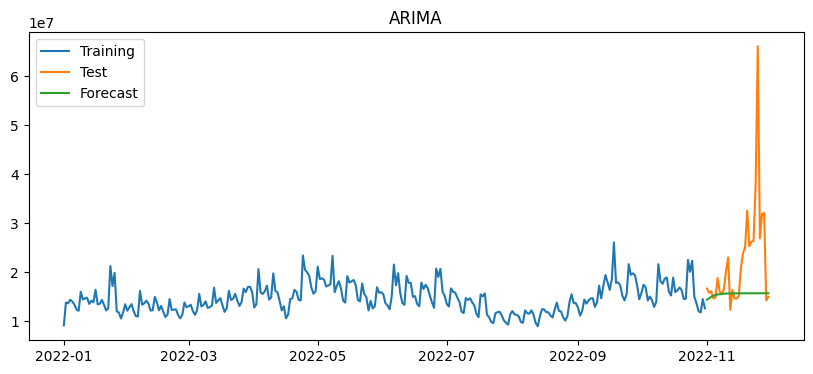

(7267923.10585061, np.float64(12366637.523841584), 0.24148240644090418)

In [47]:
assess_model('Model Arima',train['y']["2022":],test['y'],predictions_arima,'ARIMA')


#SARIMA


In [67]:
#split the  data into trainig and test

test_size = 30
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

test

,y,discount_rate,coupon_rate,y_diff
date,,,,
2022-11-01,16703680.0,23.85,1.50,4014654.0
2022-11-02,15827022.0,20.76,0.94,-876658.0
2022-11-03,16154319.0,21.85,0.92,327297.0
2022-11-04,14707212.0,20.17,0.88,-1447107.0
2022-11-05,14877530.0,17.85,0.41,170318.0
2022-11-06,18835528.0,16.40,0.31,3957998.0
2022-11-07,16094516.0,17.11,0.30,-2741012.0
2022-11-08,15589508.0,16.64,0.29,-505008.0
2022-11-09,16608320.0,18.72,0.74,1018812.0


In [ ]:
#Using pmdarima for the sarima model


model_sarima=auto_arima(train['y'],
                 m=7,
                 )



In [52]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1762
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 7)   Log Likelihood              -28727.968
Date:                             Sun, 04 Jan 2026   AIC                          57469.937
Time:                                     07:03:36   BIC                          57508.252
Sample:                                 01-04-2018   HQIC                         57484.096
                                      - 10-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9179.2596   3767.697      2.436      0.015    1794.709    1.66e+04
ar.L1         -0.5561      0.039    -14.411      0.000      -0.632      -0.480
ma.L1          0.0172      0.037      0.461      0.645      -0.056       0.091
ma.L2         -0.5016      0.019    -27.087      0.000      -0.538      -0.465
ar.S.L7        0.9806      0.009    105.358      0.000       0.962       0.999
ma.S.L7       -0.9266      0.017    -53.855      0.000      -0.960      -0.893
sigma2      9.407e+12      0.000   8.71e+16      0.000    9.41e+12    9.41e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):            738999.81
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                             4.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       102.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.24e+35. Standard errors may be unstable.
"""

In [53]:
predictions_sarima = model_sarima.predict(n_periods=test_size)

predictions_sarima

,0
2022-11-01,1.454409e+07
2022-11-02,1.424133e+07
2022-11-03,1.362620e+07
2022-11-04,1.261938e+07
2022-11-05,1.277175e+07
2022-11-06,1.598683e+07
2022-11-07,1.489856e+07
2022-11-08,1.508933e+07
2022-11-09,1.469525e+07
2022-11-10,1.415529e+07


Model:Model SArima
MAE:7666334.12
RMSE:12667060.95
MAPE:26.06%


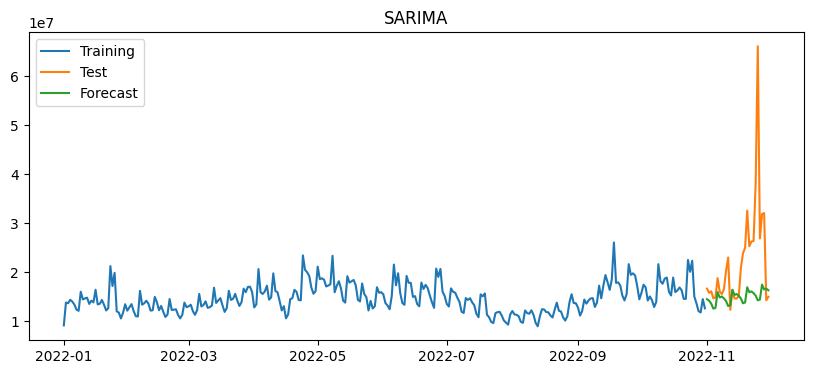

(7666334.119937375, np.float64(12667060.949282238), 0.2606045894602878)

In [55]:
assess_model('Model SArima',train['y']["2022":],test['y'],predictions_sarima,'SARIMA')


#SARIMAX

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2018-01-04 to 2022-11-30
Freq: D
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              1792 non-null   float64
 1   discount_rate  1792 non-null   object 
 2   coupon_rate    1792 non-null   object 
 3   y_diff         1792 non-null   float64
dtypes: float64(2), object(2)
memory usage: 70.0+ KB


In [56]:
df.columns

Index(['y', 'discount_rate', 'coupon_rate', 'y_diff'], dtype='object')

In [60]:
#Transform Regressors into float
df['discount_rate']=df['discount_rate'].str.replace('%','').astype(float)
df['coupon_rate']=df['coupon_rate'].str.replace('%','').astype(float)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2018-01-04 to 2022-11-30
Freq: D
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              1792 non-null   float64
 1   discount_rate  1792 non-null   float64
 2   coupon_rate    1792 non-null   float64
 3   y_diff         1792 non-null   float64
dtypes: float64(4)
memory usage: 70.0 KB


In [65]:
#split the  data into trainig and test

test_size = 30
exog_train = df.iloc[:-test_size,1:3]
exog_test = df.iloc[-test_size:,1:3]

In [66]:
exog_train.head()



,discount_rate,coupon_rate
date,,
2018-01-04,27.32,0.96
2018-01-05,25.70,0.90
2018-01-06,25.02,0.87
2018-01-07,25.33,1.06
2018-01-08,24.83,1.03


In [77]:
#Using pmdarima for the sarima model and best paramaters


model_sarimax=auto_arima(train['y'],
                 m=7,
                 X=exog_train,
                 )



In [78]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1762
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28565.450
Date:                           Sun, 04 Jan 2026   AIC                          57154.899
Time:                                   07:47:04   BIC                          57220.583
Sample:                               01-04-2018   HQIC                         57179.172
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.573e+04   7638.873      2.059      0.039     756.738    3.07e+04
discount_rate  4.051e+05   2.35e+04     17.208      0.000    3.59e+05    4.51e+05
coupon_rate     9.22e+05   6.11e+04     15.099      0.000    8.02e+05    1.04e+06
ar.L1            -0.6454      0.162     -3.981      0.000      -0.963      -0.328
ar.L2             0.1807      0.050      3.590      0.000       0.082       0.279
ma.L1             0.1005      0.161      0.623      0.534      -0.216       0.417
ma.L2            -0.6868      0.130     -5.298      0.000      -0.941      -0.433
ar.S.L7           0.0526      0.193      0.272      0.785      -0.326       0.431
ar.S.L14          0.9019      0.184      4.898      0.000       0.541       1.263
ma.S.L7           0.0169      0.188      0.089      0.929      -0.352       0.386
ma.S.L14         -0.8522      0.167     -5.098      0.000      -1.180      -0.525
sigma2         7.668e+12      0.016   4.76e+14      0.000    7.67e+12    7.67e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1070486.06
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.88e+28. Standard errors may be unstable.
"""

In [79]:
predictions_sarimax = model_sarimax.predict(n_periods=test_size,X=exog_test)

predictions_sarimax

,0
2022-11-01,1.675271e+07
2022-11-02,1.494185e+07
2022-11-03,1.487307e+07
2022-11-04,1.294061e+07
2022-11-05,1.201913e+07
2022-11-06,1.394081e+07
2022-11-07,1.340430e+07
2022-11-08,1.326646e+07
2022-11-09,1.439536e+07
2022-11-10,2.074086e+07


Model:Model SArimax
MAE:5730867.48
RMSE:10404843.96
MAPE:19.43%


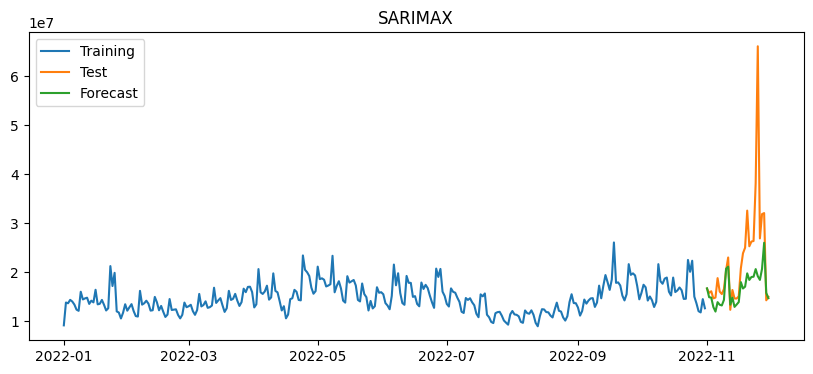

(5730867.484873545, np.float64(10404843.962988067), 0.19427331048545332)

In [80]:
assess_model('Model SArimax',train['y']["2022":],test['y'],predictions_sarimax,'SARIMAX')


#CROSS VALIDATION

In [81]:
model_cv =ARIMA(order=(2,1,2),
                seasonal_order=(2,1,2,7))

In [88]:
#set the CV rules

cv =model_selection.RollingForecastCV(
    h=30,
    step =15,
    initial = df.shape[0] -180
)

In [83]:
df.shape[0]-180

1612

In [99]:
#Input for the CV

cv_score = model_selection.cross_val_score(
    model_cv,
    y=df['y'],
    X=df.iloc[:,1:3],
    cv =cv,
    scoring='mean_squared_error',
    verbose=1,
    error_score=10000000000000000,
    # n_jobs=-1
)


#CV Performance

In [102]:
cv_score

array([3.42086425e+12, 6.62545247e+12, 3.54204060e+12, 1.38648880e+12,
       1.91389552e+12, 1.58230115e+13, 1.55830621e+13, 5.57393433e+12,
       1.56286919e+13, 3.71402539e+12, 1.45549451e+14])

In [104]:
rmse =np.sqrt(np.average(cv_score))

print(f'RMSE: {int(rmse)}')

RMSE: 4459524


#

#Parameter Tuning

In [105]:
#define parameter grid

param_grid ={'p':[1,2,3],
             'd':[0,1],
             'q':[1,2,3],
             'P':[1,2],
             'D':[0],
             'Q':[1,2]
             }


grid =ParameterGrid(param_grid)
# list(grid)

In [107]:
#Paramter Training loop

rmse_list =[]

for params in grid:
      # print(params)
    #build the model with a set of params
    model_cv =ARIMA(order=(params['p'],
                           params['d'],
                           params['q']),
                    seasonal_order=(params['P'],
                                    params['D'],
                                    params['Q'],
                                    7))

    #evaluate the model

    cv =model_selection.RollingForecastCV(
        h=30,
        step =15,
        initial = df.shape[0] -180
    )

    #Input for the CV

    cv_score = model_selection.cross_val_score(
        model,
        y=df['y'],
        X=df.iloc[:,1:3],
        cv =cv,
        scoring='mean_squared_error',
        verbose=1,
        error_score=10000000000000000,
        # n_jobs=-1
    )



    #store the error
    rmse =np.sqrt(np.average(cv_score))
    rmse_list.append(rmse)

#Checking the results

In [110]:
tuning_results =pd.DataFrame(grid)
tuning_results['rmse']=rmse_list

# tuning_results.sort_values(by='rmse',ascending=True)
tuning_results

,D,P,Q,d,p,q,rmse
0,0,1,1,0,1,1,4.334035e+06
1,0,1,1,0,1,2,4.334035e+06
2,0,1,1,0,1,3,4.334035e+06
3,0,1,1,0,2,1,4.334035e+06
4,0,1,1,0,2,2,4.334035e+06
...,...,...,...,...,...,...,...
67,0,2,2,1,2,2,4.334035e+06
68,0,2,2,1,2,3,4.334035e+06
69,0,2,2,1,3,1,4.334035e+06
70,0,2,2,1,3,2,4.334035e+06


In [128]:
#Save the best paramters

# best_params =tuning_results.sort_values(by='rmse',ascending=True).head(1)
# best_params

In [129]:
best_params=tuning_results[tuning_results['rmse']== tuning_results['rmse'].min()].transpose()
best_params


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
D,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
P,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
Q,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
d,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
p,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
q,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
rmse,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,...,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06,4.334035e+06


#Predicting the future

In [117]:
df_future =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/Arima_sarima_sarimax/future_regressors.csv',
                index_col='date',
                parse_dates=True,dayfirst=True)
df_future.head()

,revenue,discount_rate,coupon_rate,discount_rate_lag1,coupon_rate_lag1
date,,,,,
2022-12-01,NaN,0.1831,0.0031,0.1710,0.0032
2022-12-02,NaN,0.1995,0.0036,0.1831,0.0031
2022-12-03,NaN,0.2029,0.0032,0.1995,0.0036
2022-12-04,NaN,0.1898,0.0030,0.2029,0.0032
2022-12-05,NaN,0.1810,0.0042,0.1898,0.0030


In [122]:
#renaming coulmn

# df.rename(columns={'revenue':'y'},inplace=True)

In [121]:
df.head(1
        )

,y,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%


In [145]:
#Prepare data inputs

df_processed = df.copy()

# Convert 'y' column to float
df_processed['y'] = df_processed['y'].str.replace(',', '').astype(float)

# Convert 'discount_rate' and 'coupon_rate' to float
df_processed['discount_rate'] = df_processed['discount_rate'].str.replace('%','').astype(float)
df_processed['coupon_rate'] = df_processed['coupon_rate'].str.replace('%','').astype(float)

y = df_processed['y']
X = df_processed.iloc[:, 1:3] # Select discount_rate and coupon_rate

In [137]:
X

,discount_rate,coupon_rate
date,,
2018-01-01,34.27%,1.09%
2018-01-02,30.87%,1.08%
2018-01-03,28.11%,1.01%
2018-01-04,27.32%,0.96%
2018-01-05,25.70%,0.90%
...,...,...
2022-11-26,30.41%,0.38%
2022-11-27,29.75%,0.35%
2022-11-28,25.27%,8.93%


In [138]:
#fetch the best params

#best_params is a transposed DataFrame where columns are the parameter sets with min rmse
#We need to select one of these columns, e.g., the first one (column with index 0)
p =int(best_params.loc['p', 0])
d =int(best_params.loc['d', 0])
q =int(best_params.loc['q', 0])
P=int(best_params.loc['P', 0])
D=int(best_params.loc['D', 0])
Q=int(best_params.loc['Q', 0])

In [139]:
#prepare the regressor

#df_future.head(:,1:3)

X_futre =df_future.iloc[:,1:3] *100

In [146]:
#TUned Sarimax Model

tuned_model = ARIMA(order=(p,d,q),
                    seasonal_order=(P,D,Q,7),
                    )

tuned_model.fit(y,X=X)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))

In [150]:
#Forcasting



predictions =tuned_model.predict(
    n_periods = len(X_futre),
    X=X_futre,


)

##Predicting Future

In [151]:
#Data Visualization
#Function to plot the future

def plot_future(y,forcast,title):
  plt.figure(figsize=(10,4))
  plt.plot(y,label='Training')
  # plt.plot(test,label='Test')
  plt.plot(forcast,label='Forecast')
  plt.title(f"Train and Forcast with {title}")

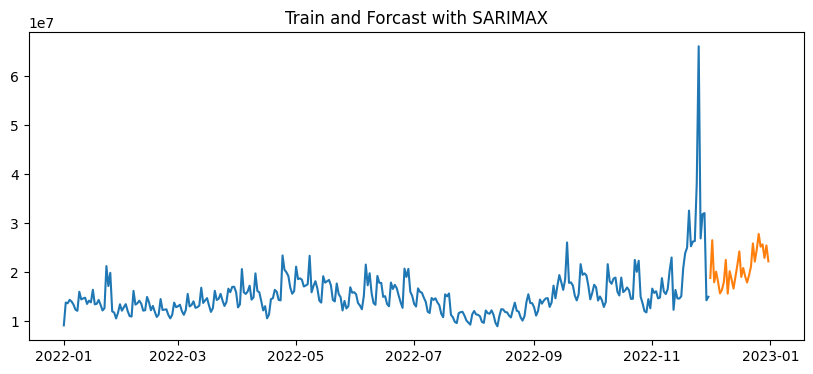

In [154]:
plot_future(y['2022':],predictions,'SARIMAX')

Left to do : Feature Engineering